In [15]:
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import  Dropout
from keras.layers import Layer
import numpy as np
import pandas as pd
import seaborn as sns
from keras.applications.vgg16 import VGG16 
from keras.applications.xception import Xception
import os
import copy
from tensorflow.keras.utils import img_to_array
import sys
tf.__version__

'2.10.1'

In [16]:
target = []
data = []

dir='D:\\A.document\\A.opencv\\projects\\apple_garden\\Dataset'
#dir_test='D:\\A.document\\A.opencv\\projects\\apple_garden\\\Dataset_test'
#Categories = ['1','2','3','4']
Categories = ['1','3','4']

In [17]:

for i in Categories:
  print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
  target_class = Categories.index(i)
  path = os.path.join(dir,i)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    img_resized =cv2.resize(img_array,(124,124))
    data.append(img_resized)
    target.append(target_class)

data = np.array(data)
target = np.array(target)

print('end')

Category is: 1 	Label encoded as: 0
Category is: 3 	Label encoded as: 1
Category is: 4 	Label encoded as: 2
end


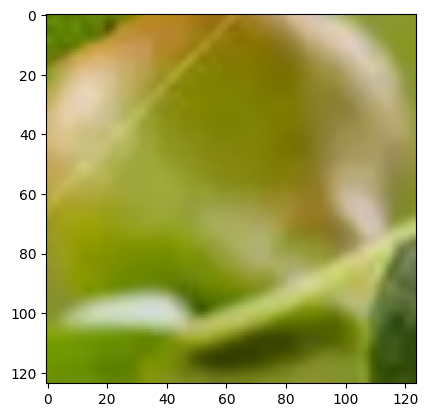

In [18]:
RGB_img=data[0]
plt.imshow(RGB_img)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.025)

X_train.shape

(2339, 124, 124, 3)

In [19]:
X_test.shape

(60, 124, 124, 3)

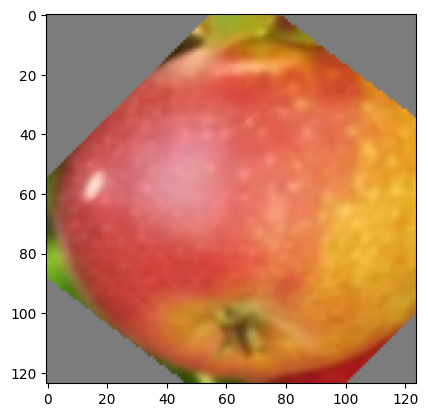

In [5]:
RGB_img_X_train=X_train[0]
plt.imshow(RGB_img_X_train)

In [54]:
X_train

array([[[[125, 125, 125],
         [125, 125, 125],
         [125, 125, 125],
         ...,
         [125, 125, 125],
         [125, 125, 125],
         [125, 125, 125]],

        [[125, 125, 125],
         [125, 125, 125],
         [125, 125, 125],
         ...,
         [125, 125, 125],
         [125, 125, 125],
         [125, 125, 125]],

        [[125, 125, 125],
         [125, 125, 125],
         [125, 125, 125],
         ...,
         [125, 125, 125],
         [125, 125, 125],
         [125, 125, 125]],

        ...,

        [[125, 125, 125],
         [125, 125, 125],
         [125, 125, 125],
         ...,
         [125, 125, 125],
         [125, 125, 125],
         [125, 125, 125]],

        [[125, 125, 125],
         [125, 125, 125],
         [125, 125, 125],
         ...,
         [125, 125, 125],
         [125, 125, 125],
         [125, 125, 125]],

        [[125, 125, 125],
         [125, 125, 125],
         [125, 125, 125],
         ...,
         [125, 125, 125],
        

In [19]:
X_test.shape

(48, 124, 124, 3)

In [39]:
y_test

array([0, 0, 2, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 0,
       0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1,
       1, 2, 1, 1])

In [20]:
class_number = 3

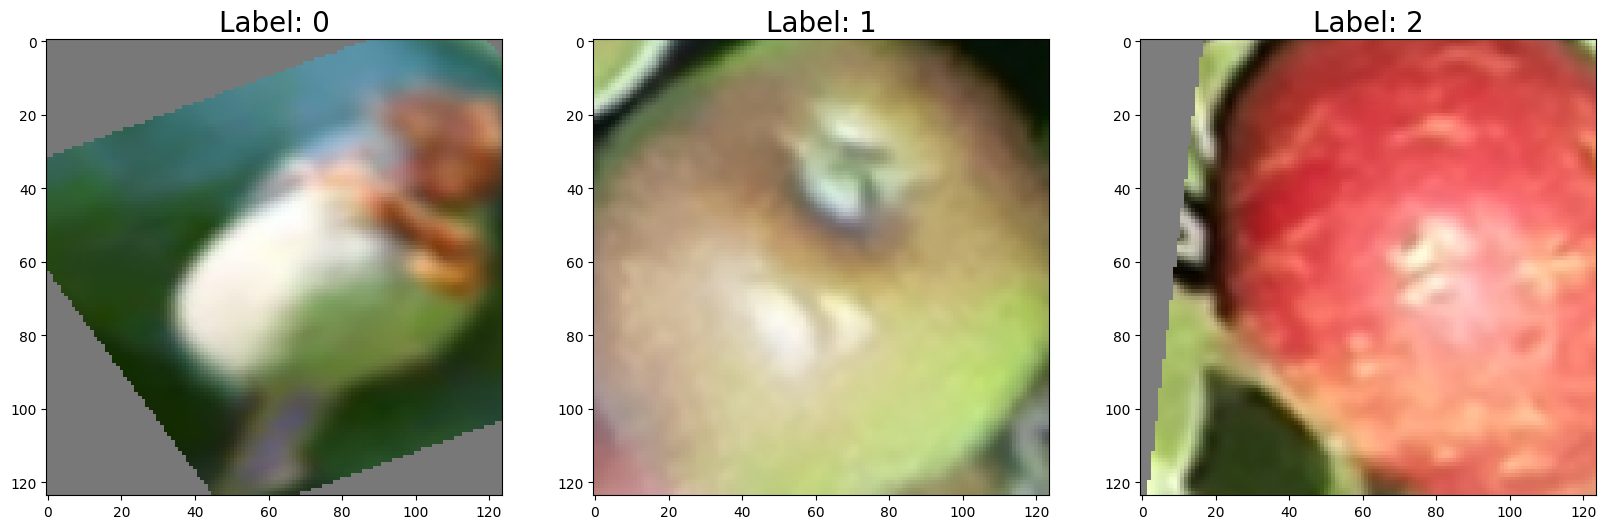

In [6]:
f, ax = plt.subplots(1, class_number, figsize=(20,20))

for i in range(0, class_number):
    apple_sample = X_train[y_train == i][0]
    #apple_sample =cv2.cvtColor(apple_sample,cv2.COLOR_BGR2RGB)
    ax[i].imshow(apple_sample)
    ax[i].set_title("Label: {}".format(i), fontsize=20)

In [21]:

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

print(X_train.shape[0], "train")
print(X_test.shape[0], "test")


y_train = keras.utils.to_categorical(y_train, class_number)
y_test = keras.utils.to_categorical(y_test, class_number)

2339 train
60 test


In [57]:
X_train

array([[[[0.49019608, 0.49019608, 0.49019608],
         [0.49019608, 0.49019608, 0.49019608],
         [0.49019608, 0.49019608, 0.49019608],
         ...,
         [0.49019608, 0.49019608, 0.49019608],
         [0.49019608, 0.49019608, 0.49019608],
         [0.49019608, 0.49019608, 0.49019608]],

        [[0.49019608, 0.49019608, 0.49019608],
         [0.49019608, 0.49019608, 0.49019608],
         [0.49019608, 0.49019608, 0.49019608],
         ...,
         [0.49019608, 0.49019608, 0.49019608],
         [0.49019608, 0.49019608, 0.49019608],
         [0.49019608, 0.49019608, 0.49019608]],

        [[0.49019608, 0.49019608, 0.49019608],
         [0.49019608, 0.49019608, 0.49019608],
         [0.49019608, 0.49019608, 0.49019608],
         ...,
         [0.49019608, 0.49019608, 0.49019608],
         [0.49019608, 0.49019608, 0.49019608],
         [0.49019608, 0.49019608, 0.49019608]],

        ...,

        [[0.49019608, 0.49019608, 0.49019608],
         [0.49019608, 0.49019608, 0.49019608]

In [22]:
model = Sequential()

#Apple_model=tf.keras.applications.ResNet50(include_top=False,weights="imagenet",input_shape=(124,124,3))
#Apple_model=tf.keras.applications.MobileNetV2(include_top=False,weights="imagenet",input_shape=(124,124,3)) 
#Apple_model=tf.keras.applications.VGG19(include_top=False,weights="imagenet",input_shape=(124,124,3))
#Apple_model=Xception(include_top=False,weights="imagenet",input_shape=(124,124,3))
Apple_model=VGG16(weights='imagenet', include_top=False, input_shape=(124,124,3))
for layer in Apple_model.layers:
        layer.trainable=False

model.add(Apple_model)

In [23]:
Apple_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 124, 124, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 124, 124, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 124, 124, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 62, 62, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 62, 62, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 62, 62, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 31, 31, 128)       0     

In [23]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(30, activation='relu'))
model.add( keras.layers.Dense(30, activation='relu'))
# model.add(keras.layers.Dropout(0.2))
model.add( keras.layers.Dense(30, activation='relu'))
model.add( keras.layers.Dense(30, activation='relu'))
#model.add(keras.layers.Dropout(0.2))
# model.add( keras.layers.Dense(128, activation='selu'))
# model.add( keras.layers.Dense(128, activation='selu'))


model.add( keras.layers.Dense(3,activation='softmax'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 30)                138270    
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 3)                

In [24]:
sgd=keras.optimizers.SGD(clipvalue=0.1)
adagrad_1=keras.optimizers.Adagrad(learning_rate=0.1)
adam=keras.optimizers.Adam(learning_rate=0.01)
Adamax1=keras.optimizers.Adamax(learning_rate=0.01)

In [25]:
model.compile(loss="categorical_crossentropy",
             optimizer=Adamax1,metrics=["accuracy"])

In [26]:
history = model.fit(X_train, y_train,batch_size=12,epochs=3000,validation_split=0.025,
                           callbacks=[keras.callbacks.EarlyStopping(patience=25,monitor='val_accuracy',restore_best_weights=True),
                           keras.callbacks.ModelCheckpoint(filepath='Apple_A22.h5',monitor='val_accuracy',save_best_only=True)])

Epoch 1/3000
190/190 [==============================] - 6s 30ms/step - loss: 0.8953 - accuracy: 0.5425 - val_loss: 0.7026 - val_accuracy: 0.7288
Epoch 2/3000
190/190 [==============================] - 5s 28ms/step - loss: 0.5451 - accuracy: 0.7675 - val_loss: 0.6052 - val_accuracy: 0.7119
Epoch 3/3000
190/190 [==============================] - 5s 28ms/step - loss: 0.4508 - accuracy: 0.8057 - val_loss: 0.5950 - val_accuracy: 0.7119
Epoch 4/3000
190/190 [==============================] - 5s 28ms/step - loss: 0.3546 - accuracy: 0.8557 - val_loss: 0.8043 - val_accuracy: 0.6780
Epoch 5/3000
190/190 [==============================] - 5s 29ms/step - loss: 0.2838 - accuracy: 0.8838 - val_loss: 0.5950 - val_accuracy: 0.8136
Epoch 6/3000
190/190 [==============================] - 5s 28ms/step - loss: 0.2346 - accuracy: 0.9132 - val_loss: 0.7181 - val_accuracy: 0.6949
Epoch 7/3000
190/190 [==============================] - 5s 28ms/step - loss: 0.1866 - accuracy: 0.9325 - val_loss: 0.7759 - val_ac

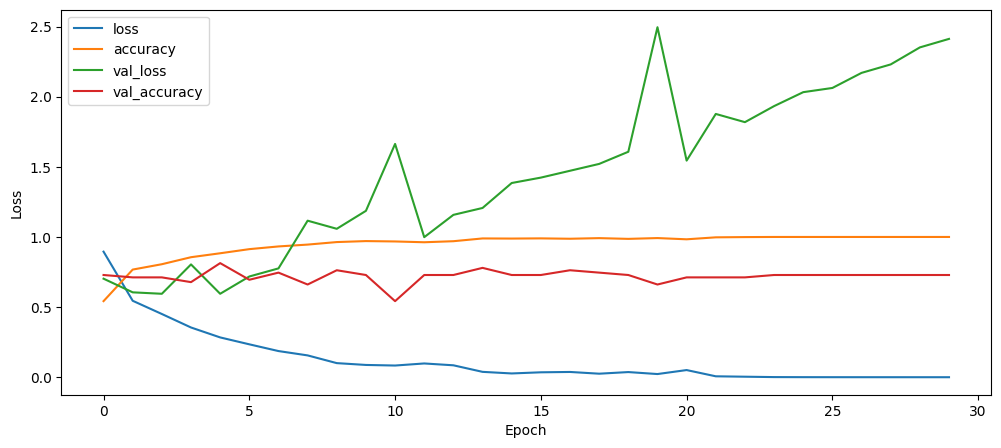

In [27]:
fig,ax = plt.subplots(figsize=(12,5))
ax=plt.plot(history.history["loss"],label="loss")
ax=plt.plot(history.history["accuracy"],label="accuracy")
ax=plt.plot(history.history["val_loss"],label="val_loss")
ax=plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [28]:
model.evaluate(X_test,y_test,verbose=1)

2/2 [==============================] - 0s 56ms/step - loss: 0.4081 - accuracy: 0.8500


[0.408140629529953, 0.8500000238418579]

In [36]:
#y_test

In [14]:
y_pred_A = model.predict(X_test)
y_pred_A = np.argmax(y_pred_A, axis=1)
print(y_pred_A)

2/2 [==============================] - 1s 385ms/step
[0 2 2 1 1 2 0 1 2 2 2 1 2 0 1 0 0 1 1 2 0 0 2 0 2 1 2 0 1 1 1 0 1 0 1 2 0
 1 2 1 0 0 2 1 1 2 0 1]


In [22]:
y_pred_A.shape

(48,)

In [16]:
#Apple_A1
model2=keras.models.load_model("Apple_A22.h5")
y_pred_classes1 = model2.predict(X_test)
y_pred_classes1 = np.argmax(y_pred_classes1, axis=1)
print(y_pred_classes1)


2/2 [==============================] - 0s 302ms/step
[0 2 2 1 1 2 0 1 2 2 2 1 2 0 1 0 0 1 1 2 0 0 2 0 2 1 2 0 1 1 1 0 1 0 1 2 0
 1 2 1 0 0 2 1 1 2 0 1]


In [75]:
model2.evaluate(X_test,y_test,verbose=1)

2/2 [==============================] - 0s 43ms/step - loss: 0.8654 - accuracy: 0.7500


[0.8654196262359619, 0.75]

In [21]:
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0

34


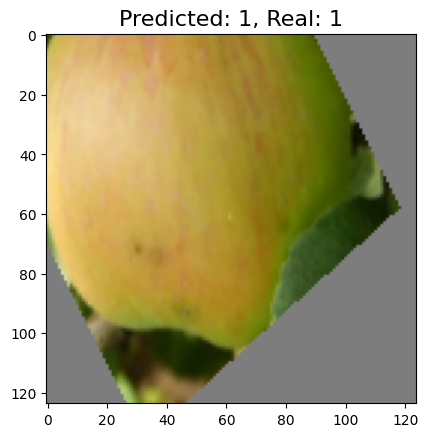

In [56]:
random_idx = np.random.choice(len(X_test))
print(random_idx)
x_sample = X_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes1[random_idx]

plt.title("Predicted: {}, Real: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(124,124,3), cmap='gray')

(124, 124, 3)
(1, 124, 124, 3)
1/1 [==============================] - 0s 198ms/step
[2]


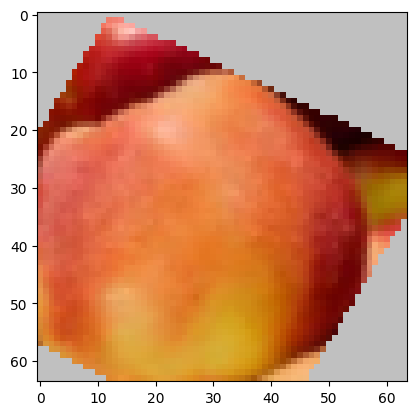

In [57]:
model2=keras.models.load_model("Apple_A1.h5")
img3_1 = cv2.imread('D:\\A.document\\A.opencv\\projects\\apple_garden\\Dataset2\\4\\aug_48_3491.png')
img3_1=cv2.cvtColor(img3_1, cv2.COLOR_BGR2RGB)
plt.imshow(img3_1)

img3=copy.copy(img3_1)

img3=cv2.resize(img3,(124,124))
print(img3.shape)

img = img3.reshape(1, 124,124, 3)
print(img.shape)
img = img.astype('float32')
img = img / 255.0


y_pred1 = model2.predict(img)
y_pred1 = np.argmax(y_pred1, axis=1)
print(y_pred1)
